# GRU 1 layer

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 6)                 390       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 543,053
Trainable params: 543,053
Non-trainable params: 0
_________________________________________________________________


In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


2022-01-15 00:37:03.456262: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8302
Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /usr/local/cuda/targets/x86_64-linux/lib/libcublas.so.11: undefined symbol: cublasGetSmCountTarget
2022-01-15 00:37:03.586920: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


391/391 [==============================] - 30s 72ms/step - loss: 0.5881 - accuracy: 0.6744 - val_loss: 0.5760 - val_accuracy: 0.6986
Epoch 2/10
391/391 [==============================] - 26s 67ms/step - loss: 0.3890 - accuracy: 0.8370 - val_loss: 0.4016 - val_accuracy: 0.8308
Epoch 3/10
391/391 [==============================] - 27s 69ms/step - loss: 0.2958 - accuracy: 0.8845 - val_loss: 0.3920 - val_accuracy: 0.8330
Epoch 4/10
391/391 [==============================] - 26s 67ms/step - loss: 0.2483 - accuracy: 0.9057 - val_loss: 0.3786 - val_accuracy: 0.8580
Epoch 5/10
391/391 [==============================] - 26s 67ms/step - loss: 0.1993 - accuracy: 0.9292 - val_loss: 0.4114 - val_accuracy: 0.8336
Epoch 6/10
391/391 [==============================] - 27s 68ms/step - loss: 0.1657 - accuracy: 0.9416 - val_loss: 0.4020 - val_accuracy: 0.8480
Epoch 7/10
391/391 [==============================] - 29s 74ms/step - loss: 0.1444 - accuracy: 0.9512 - val_loss: 0.4208 - val_accuracy: 0.8547
Epo

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

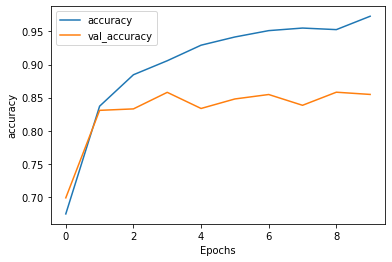

In [13]:
plot_graphs(history, 'accuracy')

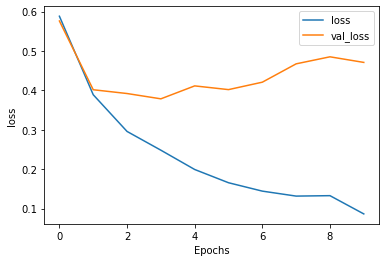

In [14]:
plot_graphs(history, 'loss')